<a href="https://colab.research.google.com/github/bforoura/GenAI/blob/main/Module1/prob_example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SPAM Detection**

This is a simple spam detection system that classifies emails as **spam** or **not spam** based on the presence of certain keywords. It illustrates the following core probability concepts:

* **Sample Space**: The sample space consists of emails that can be either spam or not spam.
* **Conditional Probabilities**: The probability of an email being spam given the presence of certain keywords.
* **Bayes' Theorem**: We'll use Bayes' Theorem to calculate the probability of an email being spam given the presence of a keyword.
* **Parametric Modeling**: We'll use a simple model where we estimate the probabilities of keywords occurring in spam and not spam emails.
* **Likelihood**: The likelihood of the parameters given the data.
* **Maximum Likelihood Estimate (MLE)**: We estimate the parameters (probabilities) that maximize the likelihood.

In [ ]:
#@title Importing the necessary libraries

!pip install tabulate

import numpy as np
from collections import Counter
from tabulate import tabulate

In [ ]:
#@title Sample data: Emails with labels (1 for spam, 0 for not spam)
emails = [
    ("Buy cheap meds now", 1),
    ("Earn money fast", 1),
    ("Hi, how are you?", 0),
    ("Cheap meds available", 1),
    ("Let's catch up soon", 0),
    ("Win a free iPhone", 1),
    ("Meeting at 10am", 0),
    ("Cheap meds for you", 1),
    ("Earn fast money now", 1),
    ("Hello, how have you been?", 0)
]



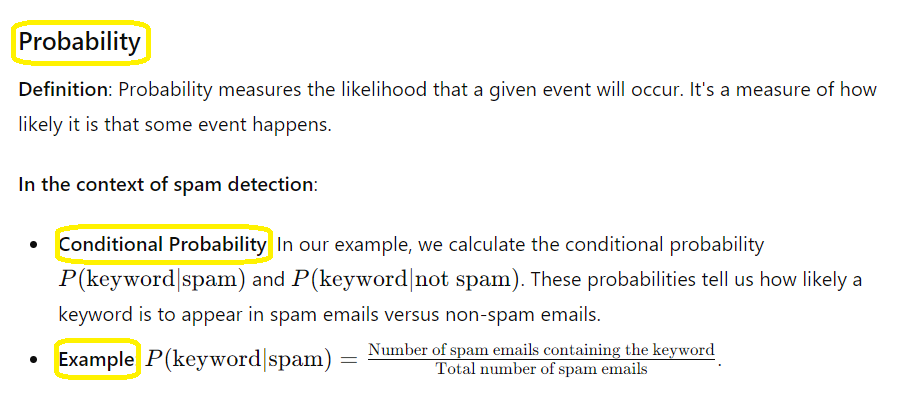

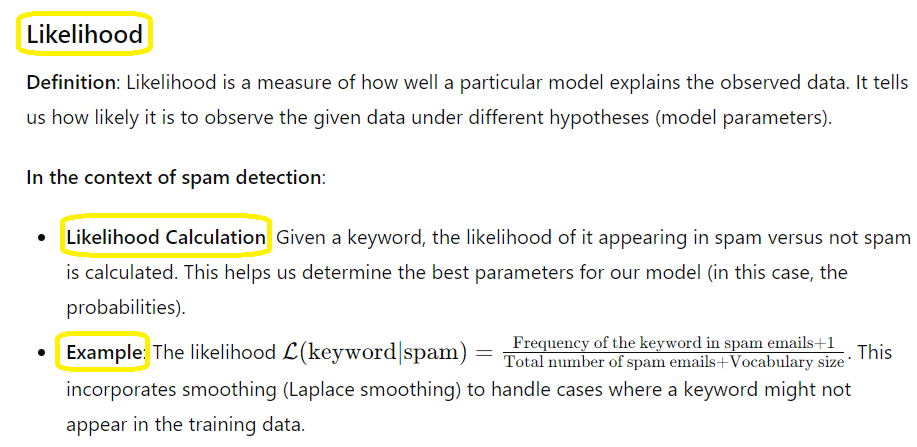

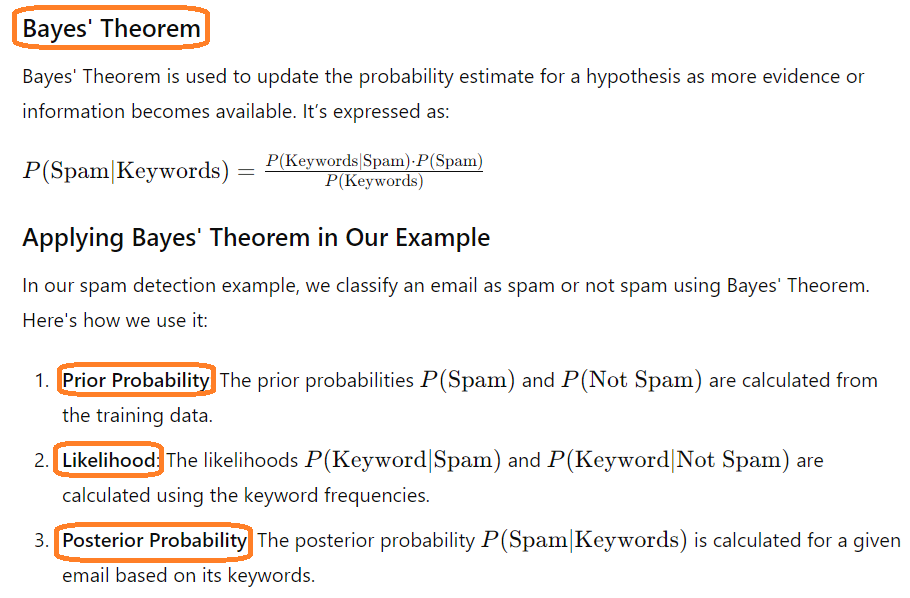

## **The Needed Functions**

* **extract_keywords()**: Extracts keywords from an email.


* **create_vocabulary()**: Creates a vocabulary of unique keywords from all emails.

* **calculate_conditional_probabilities**(): Calculates the conditional probabilities of keywords given spam and not spam labels.

* **display_conditional_probabilities**(): This function takes the vocabulary, the conditional probabilities of keywords given spam, and the conditional probabilities of keywords given not spam. It then creates a table and prints it using the tabulate library.

* **calculate_likelihoods**(): Calculates the likelihood of each keyword given the label (spam or not spam).

* **display_likelihoods**(): This function takes the vocabulary, the likelihoods of keywords given spam, and the likelihoods of keywords given not spam. It then creates a table and prints it using the tabulate library.

* **classify**(): Classifies an email as spam or not spam using Bayes' Theorem.

In [ ]:
#@title The Needed Functions
###################################################
def extract_keywords(email):
    """Extract keywords from an email."""
    return email.lower().split()


###################################################
def create_vocabulary(emails):
    """Create a vocabulary of keywords from the emails."""
    vocabulary = set()
    for email, _ in emails:
        keywords = extract_keywords(email)
        vocabulary.update(keywords)
    return list(vocabulary)


###################################################
def calculate_conditional_probabilities(emails, vocabulary):
    """Calculate conditional probabilities for keywords given spam and not spam labels."""
    keyword_counts_spam = Counter()
    keyword_counts_not_spam = Counter()
    spam_count = 0
    not_spam_count = 0

    for email, label in emails:
        keywords = extract_keywords(email)
        if label == 1:
            spam_count += 1
            keyword_counts_spam.update(keywords)
        else:
            not_spam_count += 1
            keyword_counts_not_spam.update(keywords)

    P_spam = spam_count / len(emails)
    P_not_spam = not_spam_count / len(emails)

    return P_spam, P_not_spam, keyword_counts_spam, keyword_counts_not_spam, spam_count, not_spam_count


###################################################
def calculate_likelihoods(keyword_counts, count, vocabulary, label):
    """Calculate the likelihood of a keyword given the label (spam or not spam)."""
    likelihood = {}
    for keyword in vocabulary:
        likelihood[keyword] = (keyword_counts[keyword] + 1) / (count + len(vocabulary))
    return likelihood


###################################################
def classify(email, P_spam, P_not_spam, P_keyword_given_spam, P_keyword_given_not_spam):
    """Classify an email as spam or not spam using Bayes' Theorem."""
    keywords = extract_keywords(email)
    P_spam_given_email = P_spam
    P_not_spam_given_email = P_not_spam

    for keyword in keywords:
        if keyword in P_keyword_given_spam:
            P_spam_given_email *= P_keyword_given_spam[keyword]
            P_not_spam_given_email *= P_keyword_given_not_spam[keyword]

    return 1 if P_spam_given_email > P_not_spam_given_email else 0


###################################################
def display_conditional_probabilities(vocabulary, P_keyword_given_spam, P_keyword_given_not_spam):
    """Display the conditional probabilities in tabular format."""
    table = []
    for keyword in vocabulary:
        row = [keyword, P_keyword_given_spam[keyword], P_keyword_given_not_spam[keyword]]
        table.append(row)

    headers = ["Keyword", "P(Keyword|Spam)", "P(Keyword|Not Spam)"]
    print(tabulate(table, headers, tablefmt="pretty"))


###################################################
def display_likelihoods(vocabulary, P_keyword_given_spam, P_keyword_given_not_spam):
    """Display the likelihoods in tabular format."""
    table = []
    for keyword in vocabulary:
        row = [keyword, P_keyword_given_spam[keyword], P_keyword_given_not_spam[keyword]]
        table.append(row)

    headers = ["Keyword", "Likelihood(Keyword|Spam)", "Likelihood(Keyword|Not Spam)"]
    print(tabulate(table, headers, tablefmt="pretty"))



In [ ]:
#@title Process Data and Classify the Emails


###################################################
# Step 1: Create vocabulary
###################################################
vocabulary = create_vocabulary(emails)

print ("-----------------------")
print ("Vocabulary:", vocabulary)
print ("-----------------------")


###################################################
# Step 2: Calculate conditional probabilities
###################################################
P_spam, P_not_spam, keyword_counts_spam, keyword_counts_not_spam, spam_count, not_spam_count = calculate_conditional_probabilities(emails, vocabulary)


###################################################
# Step 4: Display conditional probabilities
display_conditional_probabilities(vocabulary, P_keyword_given_spam, P_keyword_given_not_spam)
###################################################



###################################################
# Step 4: Calculate likelihoods
###################################################
P_keyword_given_spam = calculate_likelihood(keyword_counts_spam, spam_count, vocabulary, 1)
P_keyword_given_not_spam = calculate_likelihood(keyword_counts_not_spam, not_spam_count, vocabulary, 0)


###################################################
# Step 5: Display likelihoods
display_likelihoods(vocabulary, P_keyword_given_spam, P_keyword_given_not_spam)
###################################################



###################################################
# Step 6: Test the classifier
###################################################
test_emails = [
    "Cheap meds now",
    "Hello friend",
    "Earn money quickly",
    "Meeting at 10"
]


###################################################
print("Spam Detection Results:")
print("-----------------------")
###################################################
for email in test_emails:
    result = classify(email, P_spam, P_not_spam, P_keyword_given_spam, P_keyword_given_not_spam)
    label = "Spam" if result == 1 else "Not Spam"
    print(f"Email: '{email}' -> {label}")


-----------------------
Vocabulary: ['money', 'are', 'up', 'fast', "let's", 'soon', 'hello,', 'cheap', 'a', '10am', 'you?', 'buy', 'meeting', 'catch', 'have', 'at', 'been?', 'earn', 'now', 'win', 'you', 'free', 'meds', 'available', 'iphone', 'for', 'hi,', 'how']
-----------------------
+-----------+----------------------+---------------------+
|  Keyword  |   P(Keyword|Spam)    | P(Keyword|Not Spam) |
+-----------+----------------------+---------------------+
|   money   | 0.08823529411764706  |       0.03125       |
|    are    | 0.029411764705882353 |       0.0625        |
|    up     | 0.029411764705882353 |       0.0625        |
|   fast    | 0.08823529411764706  |       0.03125       |
|   let's   | 0.029411764705882353 |       0.0625        |
|   soon    | 0.029411764705882353 |       0.0625        |
|  hello,   | 0.029411764705882353 |       0.0625        |
|   cheap   | 0.11764705882352941  |       0.03125       |
|     a     | 0.058823529411764705 |       0.03125       |
|   1